# Visualizing Bike Sharing Ridership in Washington DC and New York City

<i>Giri Kuncoro (gk256), Sam Tung (sat83)</i>

(Note: Having the same interest in bike share programs, Sam and Giri decided to work together on this project. While Giri’s work primarily relates to bikeshare data in DC, Sam is responsible for analysis of the NYC data. Compare to the 3/23 post, we revised the research questions to analyze factors that might affect the use of bike share programs.)

## 1. Research Background

Nowadays, a bike-friendly city can be seen as one of indicators of a smart city. With more and more people migrating to the cities (urbanization), new modern mobility solutions are needed, and the bicycle proves that it can offer such a solution. According to a study from Denmark, society enjoys a net profit of 23 cents for every kilometer cycled and suffers a net loss of -16 cents for every kilometer driven by car. There are over 500 bike-sharing programs around the world, including one in Giri’s hometown in Indonesia: Bandung, not Jakarta. While the US is lagging behind Europe when it comes to taking biking as a serious replacement for driving cars, bike-friendly initiatives are popping up throughout US. 

We are curious as to whether we can get valuable insights from the two largest bike share programs in US, Capital Bikeshare in DC and Citi Bike in NYC, and build a set of tools that can be used to study similar programs in other cities and countries. DC and NYC were chosen due to their great number of riders and stations spread throughout the cities. Capital Bikeshare, one of the earliest initiatives, started in 2010 and now has established more than 300 bike stations in DC. In comparison, Citi Bike just started in 2013, but it is growing so fast that it has outgrown the program in DC with roughly the same number of stations. According to data, there are more than 1.2 million trips generated in 2011 for DC and 8 million trips in 2014 for NYC. This study investigates following research questions:

### Big Question

What factors impact bike share ridership in NYC and DC?

##### Sub Questions

Q1: What are the busiest bike stations in DC and NYC? Which stations and places do people visit the most? Are there stations bikes tend to flow to and from?

Q2: What factors make the bike stations popular places for departures and destinations?

Q3: Can we estimate number of bike share riders based on a station’s location?

-------------

## Current Progress

In [2]:
%matplotlib inline

import numpy as np
from pylab import *
import csv
from collections import *

### Functions

For this week, we made some functions that parse our data to help us understand what stations the most visited for both the DC and NYC areas.

In [21]:
def get_top_stations_dc(N=10):
    cnt = {}
    cnt['start_station'] = Counter()
    cnt['end_station'] = Counter()

    data = ['Q1','Q2','Q3','Q4']
    for quarter in data:  
        with open('../data/cleaned/2011-{0}-Trips-History-Data.csv'.format(quarter),'rU') as f:
            reader = csv.DictReader(f)
            for row in reader:
                cnt['start_station'][row['Start station ID']] += 1
                cnt['end_station'][row['End station ID']] += 1

    return {'start_station': cnt['start_station'].most_common(N),
            'end_station': cnt['end_station'].most_common(N),}

In [22]:
def get_station_info_dc(station_id):
    with open('../data/cleaned/bike_stations.csv','rU') as f:
        reader = csv.DictReader(f)
        bike_station = {}
        for row in reader:
            bike_station[row['terminalName']] = {'name': row['name'], 'lat': row['lat'], 'long': row['long']}
    
    return bike_station[station_id]

In [23]:
def get_top_stations_nyc(N=10):
    cnt = {}
    cnt['start_station'] = Counter()
    cnt['end_station'] = Counter()

    data = ['01','02','03','04','05','06','07','08','09','10','11','12']
    for month in data:  
        with open('../data/cleaned/2014-{0} - Citi Bike trip data.csv'.format(month),'rU') as f:
            reader = csv.DictReader(f)
            for row in reader:
                cnt['start_station'][row['start station name']] += 1
                cnt['end_station'][row['end station name']] += 1

    return {'start_station': cnt['start_station'].most_common(N),
            'end_station': cnt['end_station'].most_common(N),}

In [3]:
def get_top_trips_nyc(N=10):

    trips = []
    
    data = ['01','02','03','04','05','06','07','08','09','10','11','12']
    for month in data:  
        with open('../data/cleaned/2014-{0} - Citi Bike trip data.csv'.format(month),'rU') as f:
            reader = csv.DictReader(f)
            for row in reader:
                trips.append((row['start station name'],row['end station name']))

    return Counter(trips).most_common(N)

In [4]:
def get_top_trips_dc(N=10):

    trips = []
    
    data = ['Q1','Q2','Q3','Q4']
    for quarter in data:  
        with open('../data/cleaned/2011-{0}-Trips-History-Data.csv'.format(quarter),'rU') as f:
            reader = csv.DictReader(f)
            for row in reader:
                trips.append((row['Start station'],row['End station']))

    return Counter(trips).most_common(N)

In [29]:
top_stations_dc = get_top_stations_dc()
top_stations_nyc = get_top_stations_nyc()

In [34]:
start_stations_dc = [(get_station_info_dc(station[0])['name'],station[1]) for station in top_stations_dc['start_station']]
end_stations_dc = [(get_station_info_dc(station[0])['name'],station[1]) for station in top_stations_dc['end_station']]
start_stations_nyc = [(station[0],station[1]) for station in top_stations_nyc['start_station']]
end_stations_nyc = [(station[0],station[1]) for station in top_stations_nyc['end_station']]

print start_stations_dc
print end_stations_dc
print start_stations_nyc
print end_stations_nyc

[('Massachusetts Ave & Dupont Circle NW', 49642), ('15th & P St NW', 33204), ('Columbus Circle / Union Station', 32324), ('Adams Mill & Columbia Rd NW', 30355), ('17th & Corcoran St NW', 28559), ('14th & V St NW', 25511), ('New Hampshire Ave & T St NW', 24334), ('20th St & Florida Ave NW', 24229), ('14th & Rhode Island Ave NW', 24107), ('21st & I St NW', 23843)]
[('Massachusetts Ave & Dupont Circle NW', 54455), ('15th & P St NW', 36962), ('Columbus Circle / Union Station', 32518), ('17th & Corcoran St NW', 29505), ('Adams Mill & Columbia Rd NW', 26640), ('8th & H St NW', 25621), ('21st & I St NW', 25552), ('14th & V St NW', 25430), ('14th & Rhode Island Ave NW', 24760), ('USDA / 12th & Independence Ave SW', 24477)]
[('8 Ave & W 31 St', 100498), ('Lafayette St & E 8 St', 86692), ('E 17 St & Broadway', 80166), ('W 21 St & 6 Ave', 73448), ('Broadway & E 14 St', 65852), ('West St & Chambers St', 63221), ('Broadway & E 22 St', 60932), ('Cleveland Pl & Spring St', 60092), ('University Pl & E

In [36]:
def plot_bike(stations, year, title_name, N=10): 
    val = [station[1] for station in stations[::-1]]
    pos = arange(N) + .5
    
    barh(pos,val,align='center',color='c')
    yticks(pos, [station[0] for station in stations[::-1]])
    xlabel('Number of riders in {0}'.format(year))
    title(title_name)
    grid(True)

    show()

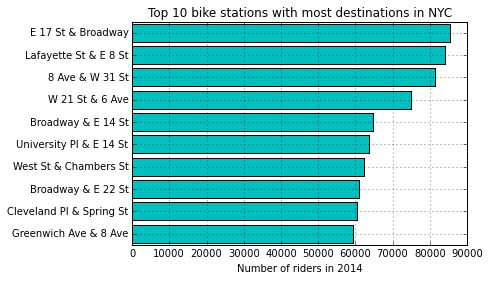

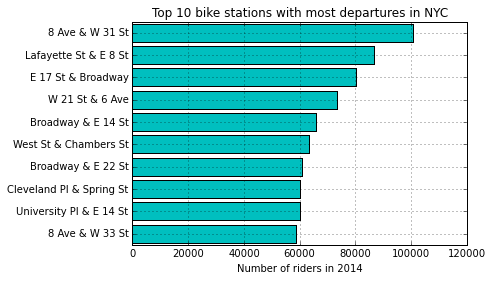

In [38]:
plot_bike(end_stations_nyc, '2014', 'Top 10 bike stations with most destinations in NYC')
plot_bike(start_stations_nyc, '2014', 'Top 10 bike stations with most departures in NYC')

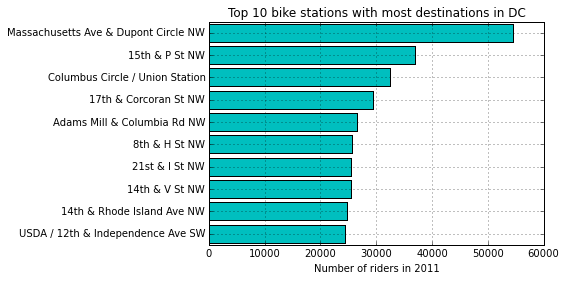

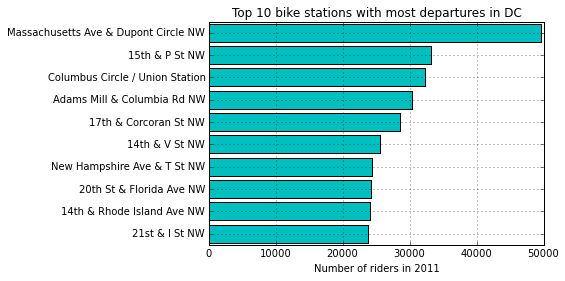

In [40]:
plot_bike(end_stations_dc, '2011', 'Top 10 bike stations with most destinations in DC')
plot_bike(start_stations_dc, '2011', 'Top 10 bike stations with most departures in DC')

In [5]:
nyc_trips = get_top_trips_nyc()
dc_trips = get_top_trips_dc()

An interesting thing to note about this is that the most common NYC bike trip starts at Central Park and ends at Central Park. The most likely explanation for this would be that a bike rider wants to bike in Central Park for some exercise and returns to the same station after finishing. Broadway & W 60 St is also by Central Park, as is Grand Army Plaza, making it highly likely that the top three most common trips are leisure cycles through Central Park.

DC, on the other hand, also shows a pattern, but for what seems to be a different purpose. Eastern Market Metro / Pennsylvania Ave & 7th St SE to Lincoln Park / 13th & East Capitol St NE seems to be the most common trip, and three trips down, the trip in reverse appears. Likewise, the second and third most common trips in the DC area seem to be reflexive. A precursory glance at the frequencies makes it seem likely that these people are trying to get to either get to work or sightsee, which is a different pattern of activity than the NYC data seemed to reveal.

In [ ]:
nyc_trips

In [ ]:
dc_trips

In [ ]:
print get_station_info_dc('31613')
print get_station_info_dc('31619')

print get_station_info_dc('31106')
print get_station_info_dc('31104')

print get_station_info_dc('31217')

print get_station_info_dc('31200')
print get_station_info_dc('31201')
print get_station_info_dc('31229')
print get_station_info_dc('31623')
print get_station_info_dc('31611')

In [6]:
dc_trips

[(('Eastern Market Metro / Pennsylvania Ave & 7th St SE (31613)',
   'Lincoln Park / 13th & East Capitol St NE  (31619)'),
  4441),
 (('Calvert St & Woodley Pl NW (31106)',
   'Adams Mill & Columbia Rd NW (31104)'),
  4349),
 (('Adams Mill & Columbia Rd NW (31104)',
   'Calvert St & Woodley Pl NW (31106)'),
  4330),
 (('Lincoln Park / 13th & East Capitol St NE  (31619)',
   'Eastern Market Metro / Pennsylvania Ave & 7th St SE (31613)'),
  3462),
 (('USDA / 12th & Independence Ave SW (31217)',
   'USDA / 12th & Independence Ave SW (31217)'),
  3332),
 (('Massachusetts Ave & Dupont Circle NW (31200)', '15th & P St NW (31201)'),
  3238),
 (('16th & U St NW (31229)', 'Massachusetts Ave & Dupont Circle NW (31200)'),
  2992),
 (('15th & P St NW (31201)', 'Massachusetts Ave & Dupont Circle NW (31200)'),
  2838),
 (('Columbus Circle / Union Station (31623)', '13th & H St NE (31611)'), 2647),
 (('Massachusetts Ave & Dupont Circle NW (31200)',
   'Massachusetts Ave & Dupont Circle NW (31200)'),


In [63]:
from dateutil import parser

'''
set param='depart' or param='arrive'
'''
def count_trips(times,param,param2=None):
    trips = OrderedDict()
    for day in range(0,7):
        trips[str(day)] = OrderedDict()
        for hour in range(0,24):
            trips[str(day)][str(hour)] = 0

    counter = 0
    for time in times[param]:
        hour = parser.parse(time).strftime("%-H")
        day = parser.parse(time).strftime("%w")
        trips[day][hour] += 1
        counter += 1
        if (counter % 20000 == 0):
            print "Counted {0} trips".format(counter)
    
    if param2 is not None:
        for time in times[param2]:
            hour = parser.parse(time).strftime("%-H")
            day = parser.parse(time).strftime("%w")
            trips[day][hour] += 1
            counter += 1
            if (counter % 20000 == 0):
                print "Counted {0} trips".format(counter)
            
    return trips

In [31]:
import csv

def write_tsv(file_name, trips_dict):
    trips_array = list()
    for day in trips_dict:
        for hour in trips_dict[day]:
            trips_array.append({'day':day,'hour':hour,'count':trips_dict[day][hour]})

    with open(file_name, 'w') as f:
        dict_writer = csv.DictWriter(f, delimiter='\t',fieldnames=['day','hour','count'])
        dict_writer.writeheader()
        dict_writer.writerows(trips_array)

In [1]:
def get_one_way_dc():
    times = dict()
    times['depart'] = []
    times['arrive'] = []

    data = ['Q1','Q2','Q3','Q4']
    for quarter in data:  
        with open('../data/cleaned/2011-{0}-Trips-History-Data.csv'.format(quarter),'rU') as f:
            reader = csv.DictReader(f)
            for row in reader:
                if row['Start station ID'] == row['End station ID']:
                    times['depart'].append(row['Start date'])
                    times['arrive'].append(row['End date'])
    return times

In [2]:
def get_roundtrip_dc():
    times = dict()
    times['depart'] = []
    times['arrive'] = []

    data = ['Q1','Q2','Q3','Q4']
    for quarter in data:  
        with open('../data/cleaned/2011-{0}-Trips-History-Data.csv'.format(quarter),'rU') as f:
            reader = csv.DictReader(f)
            for row in reader:
                if row['Start station ID'] != row['End station ID']:
                    times['depart'].append(row['Start date'])
                    times['arrive'].append(row['End date'])
    return times

In [40]:
dc_one_way_data = get_one_way_dc()
dc_one_way_trips = count_trips_dc(dc_one_way_data, 'arrive', 'depart')
write_tsv('data/dc_one_way.tsv',dc_one_way_trips)

Counted 20000 trips
Counted 40000 trips
Counted 60000 trips
Counted 80000 trips
Counted 100000 trips
Counted 120000 trips


In [41]:
dc_roundtrip_data = get_roundtrip_dc()
dc_round_trips = count_trips_dc(dc_roundtrip_data, 'arrive', 'depart')

Counted 20000 trips
Counted 40000 trips
Counted 60000 trips
Counted 80000 trips
Counted 100000 trips
Counted 120000 trips
Counted 140000 trips
Counted 160000 trips
Counted 180000 trips
Counted 200000 trips
Counted 220000 trips
Counted 240000 trips
Counted 260000 trips
Counted 280000 trips
Counted 300000 trips
Counted 320000 trips
Counted 340000 trips
Counted 360000 trips
Counted 380000 trips
Counted 400000 trips
Counted 420000 trips
Counted 440000 trips
Counted 460000 trips
Counted 480000 trips
Counted 500000 trips
Counted 520000 trips
Counted 540000 trips
Counted 560000 trips
Counted 580000 trips
Counted 600000 trips
Counted 620000 trips
Counted 640000 trips
Counted 660000 trips
Counted 680000 trips
Counted 700000 trips
Counted 720000 trips
Counted 740000 trips
Counted 760000 trips
Counted 780000 trips
Counted 800000 trips
Counted 820000 trips
Counted 840000 trips
Counted 860000 trips
Counted 880000 trips
Counted 900000 trips
Counted 920000 trips
Counted 940000 trips
Counted 960000 tr

In [42]:
write_tsv('data/dc_round_trips.tsv',dc_round_trips)

In [45]:
def get_round_trip_nyc():
    times = dict()
    times['depart'] = []
    times['arrive'] = []

    data = ['01','02','03','04','05','06','07','08','09','10','11','12']
    for month in data:
        with open('../data/cleaned/2014-{0} - Citi Bike trip data.csv'.format(month),'rU') as f:
            reader = csv.DictReader(f)
            for row in reader:
                if row['start station id'] == row['end station id']:
                    times['depart'].append(row['starttime'])
                    times['arrive'].append(row['stoptime'])
    return times

In [68]:
def get_one_way_nyc():
    times = dict()
    times['depart'] = []
    times['arrive'] = []

    data = ['01','02','03','04','05','06','07','08','09','10','11','12']
    for month in data:
        with open('../data/cleaned/2014-{0} - Citi Bike trip data.csv'.format(month),'rU') as f:
            reader = csv.DictReader(f)
            for row in reader:
                if row['start station id'] != row['end station id']:
                    times['depart'].append(row['starttime'])
                    times['arrive'].append(row['stoptime'])
    return times

In [46]:
nyc_round_trip_data = get_round_trip_nyc()

In [67]:
nyc_round_trip = count_trips(nyc_round_trip_data, 'arrive', 'depart')

Counted 20000 trips
Counted 40000 trips
Counted 60000 trips
Counted 80000 trips
Counted 100000 trips
Counted 120000 trips
Counted 140000 trips
Counted 160000 trips
Counted 180000 trips
Counted 200000 trips
Counted 220000 trips
Counted 240000 trips
Counted 260000 trips
Counted 280000 trips
Counted 300000 trips
Counted 320000 trips
Counted 340000 trips
Counted 360000 trips
Counted 380000 trips
Counted 400000 trips


In [69]:
write_tsv('data/nyc_round_trips.tsv',nyc_round_trip)

In [71]:
nyc_one_way_data = get_one_way_nyc()
nyc_one_way = count_trips(nyc_one_way_data, 'arrive', 'depart')
write_tsv('data/nyc_one_way.tsv',nyc_one_way)

Counted 20000 trips
Counted 40000 trips
Counted 60000 trips
Counted 80000 trips
Counted 100000 trips
Counted 120000 trips
Counted 140000 trips
Counted 160000 trips
Counted 180000 trips
Counted 200000 trips
Counted 220000 trips
Counted 240000 trips
Counted 260000 trips
Counted 280000 trips
Counted 300000 trips
Counted 320000 trips
Counted 340000 trips
Counted 360000 trips
Counted 380000 trips
Counted 400000 trips
Counted 420000 trips
Counted 440000 trips
Counted 460000 trips
Counted 480000 trips
Counted 500000 trips
Counted 520000 trips
Counted 540000 trips
Counted 560000 trips
Counted 580000 trips
Counted 600000 trips
Counted 620000 trips
Counted 640000 trips
Counted 660000 trips
Counted 680000 trips
Counted 700000 trips
Counted 720000 trips
Counted 740000 trips
Counted 760000 trips
Counted 780000 trips
Counted 800000 trips
Counted 820000 trips
Counted 840000 trips
Counted 860000 trips
Counted 880000 trips
Counted 900000 trips
Counted 920000 trips
Counted 940000 trips
Counted 960000 tr